In [1]:
# importing data manipulation as well as plotting packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# importing statistical packages
import statsmodels.api as sm
import scipy

%matplotlib inline

# Sentry Shoals Dataset

In [11]:
# importing the environment canada data set with the date as the index column
gwv_data = pd.read_csv('../data/c46131.csv', sep=',', index_col='DATE')

# Deleting empty columns
del gwv_data['WSS$']
del gwv_data['WSS$.1']


This is where I want to explore the individual trends of sea surface temperature and wave height across the 10 year period between 2005 and 2015

In [12]:
# Chagning the data index (time) into pandas datetime format
gwv_data.index = pd.to_datetime(gwv_data.index, unit='m')

# Collapsing the data so that all data are averaged over a 1 month perdiod
gwv_monthly = gwv_data.resample('M', how=('mean'))

# Subsetting the data for the last 11 years (this is the time period for which the plankton data have been collected)
gwv_modern = gwv_monthly['2005-01-01':'2015-10-31']

# dropping the rows where naN's are present in anticipation of calculating the linear model
gwv_modern = gwv_modern.dropna()
gwv_modern.head()

,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,
2005-01-31,1.409459,49.91,124.99,14,0.368446,3.703676,0.367973,0.697027,3.603378,206.602703,5.264324,6.656216,204.608108,5.347297,6.777162,1015.986486,1015.981081,4.918108,7.245676
2005-02-28,1.873874,49.91,124.99,14,0.226757,3.811862,0.221171,0.565465,3.505856,230.183183,3.895495,4.872072,226.009009,3.941291,4.956156,1019.557357,1019.563363,5.710661,7.261562
2005-03-31,1.432099,49.91,124.99,14,0.379520,3.638724,0.378738,1.016049,3.503155,194.122085,5.304664,6.520439,192.533608,5.334294,6.586145,1014.696845,1014.736351,8.226337,8.755144
2005-04-30,1.531161,49.91,124.99,14,0.480354,3.858300,0.476912,1.323938,3.758782,194.838527,5.837960,7.234136,190.950425,5.794051,7.208074,1014.522663,1014.573088,10.098725,10.296459
2005-05-31,1.518268,49.91,124.99,14,0.302179,3.242327,0.298647,1.072666,3.144114,209.167794,4.934777,5.959811,204.784844,4.875643,5.938836,1013.208931,1013.316103,13.606901,13.626116


In [6]:
# calculating the linear model for significant wave height and sea surface temperature
lm = sm.formula.ols(formula='sig_wave_height ~ sea_surface_temperature', data = gwv_modern).fit()

# Creating a new data frame with the range of x values that we will pass the linear model
range_data_x = pd.DataFrame({'sea_surface_temperature': range(6, 19)})

# Calculating the linear model predictions from the x values in our range data set
y_preds = lm.predict(range_data_x)
y_preds[1:10]

array([ 0.45946216,  0.43503807,  0.41061399,  0.3861899 ,  0.36176581,
        0.33734172,  0.31291763,  0.28849354,  0.26406946])

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


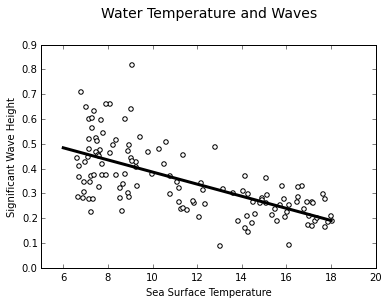

In [8]:
# Plotting sea surface temperature and significant wave height again... But this time with the linear model included
gwv_modern.plot(kind='scatter', x= 'sea_surface_temperature', y='sig_wave_height', color='w')

plt.xlabel('Sea Surface Temperature')
plt.ylabel('Significant Wave Height')
plt.title('Water Temperature and Waves', y=1.1, fontsize=14)

plt.xlim(5, 20)
plt.ylim(0,0.9)

plt.plot(range_data_x, y_preds, color='k', linewidth=3)

In [9]:
# Obtaining the intercept and slope of the linear model
print(lm.params)

# Obtaining the linear regression statistical summary
print(lm.summary())

Intercept                  0.630431
sea_surface_temperature   -0.024424
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        sig_wave_height   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     97.20
Date:                Mon, 09 Nov 2015   Prob (F-statistic):           2.25e-17
Time:                        09:21:01   Log-Likelihood:                 108.09
No. Observations:                 129   AIC:                            -212.2
Df Residuals:                     127   BIC:                            -206.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------

In [20]:
# Chagning the data index (time) into pandas datetime format
gwv_data.index = pd.to_datetime(gwv_data.index, unit='m')

# Collapsing the data so that all data are averaged over an annual perdiod
gwv_yearly = gwv_data.resample('A', how=('mean'))

# Subsetting the data for the last 11 years (this is the time period for which the plankton data have been collected)
gwv_modern_yearly = gwv_yearly['2005-01-01':'2015-10-31']

# dropping the rows where naN's are present in anticipation of calculating the linear model
gwv_modern_yearly = gwv_modern_yearly.dropna()
gwv_modern_yearly.head()

,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,
2005-12-31,1.508283,49.91,124.99,14,0.320708,3.493091,0.318776,0.877520,3.382248,214.772895,4.810999,5.944259,211.598711,4.771641,5.937276,1015.720824,1015.648792,10.829337,11.617879
2006-12-31,1.490228,49.91,124.99,14,0.366603,3.455356,0.376901,0.922519,3.334107,220.891691,5.321851,6.530097,217.234018,5.292548,6.545417,1015.253688,1015.099483,10.344244,11.031976
2007-12-31,1.871421,49.91,124.99,14,0.366006,3.909711,0.426558,1.042308,3.388279,197.652021,5.132313,6.364935,199.296322,5.428285,6.794989,1016.627892,1016.626418,10.107510,11.041044
2008-12-31,1.364909,49.91,124.99,14,0.388762,3.325326,0.387898,1.023543,3.277791,206.560972,4.955423,6.131484,207.888757,5.240547,6.542872,1017.232712,1017.252794,9.275505,10.336478
2009-12-31,1.496609,49.91,124.99,14,0.371986,3.342011,0.369375,1.043388,3.263429,220.487406,4.940191,6.103693,215.063696,5.268830,6.557920,1016.842298,1016.888896,9.741838,10.863127


In [22]:
#calculating the linear model for significant wave height and sea surface temperature
lm = sm.formula.ols(formula='sig_wave_height ~ sea_surface_temperature', data = gwv_modern_yearly).fit()

# Creating a new data frame with the range of x values that we will pass the linear model
range_data_x = pd.DataFrame({'sea_surface_temperature': range(6, 19)})

# Calculating the linear model predictions from the x values in our range data set
y_preds = lm.predict(range_data_x)
y_preds[1:10]

array([ 0.50262015,  0.46849507,  0.43436998,  0.4002449 ,  0.36611982,
        0.33199473,  0.29786965,  0.26374457,  0.22961948])

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


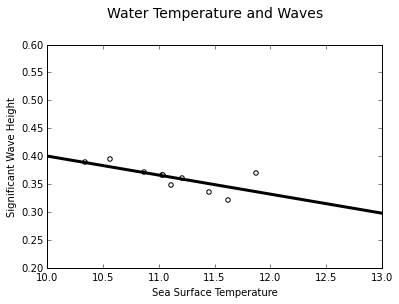

In [26]:
# Plotting sea surface temperature and signficant wave height with the linear model included
gwv_modern_yearly.plot(kind='scatter', x= 'sea_surface_temperature', y='sig_wave_height', color='w')

plt.xlabel('Sea Surface Temperature')
plt.ylabel('Significant Wave Height')
plt.title('Water Temperature and Waves', y=1.1, fontsize=14)

plt.xlim(10, 13)
plt.ylim(0.2,0.6)

plt.plot(range_data_x, y_preds, color='k', linewidth=3)

In [27]:
# Obtaining the intercept and slope of the linear model
print(lm.params)

# Obtaining the linear regression statistical summary
print(lm.summary())

Intercept                  0.741496
sea_surface_temperature   -0.034125
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        sig_wave_height   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     7.622
Date:                Mon, 09 Nov 2015   Prob (F-statistic):             0.0246
Time:                        10:19:36   Log-Likelihood:                 27.551
No. Observations:                  10   AIC:                            -51.10
Df Residuals:                       8   BIC:                            -50.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------

//anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  int(n))


I can see that the author has created two graphs comparing water temperature and waves. I ran all cells, and the graphs still come up, which means that the code that is there works as it is supposed to.  After reviewing the code present, I can not make any suggestions to make that code more efficient.  It makes sense that once the author has compiled all of their data, they will be able to use a similar infrastructure of code for creating the final graphs for their project.  I will be able to answer the Mozilla questions once we are all further along on our project.